In [2]:
import pylab

In [2]:
mypath = "database/"
data_name = [f for f in listdir(mypath) if isfile(join(mypath, f)) and ".pgm" in f]
data = {}
curr_id = 0
classe_of_id = {}
id_of_classe = {}
for f in data_name:
    print("Processing", f)
    img = Image.open(mypath+f)
    classe_name = f.split("-")[0]
    if not classe_name in id_of_classe:
        id_of_classe[classe_name] = curr_id
        classe_of_id[curr_id] = classe_name
        curr_id += 1
    the_id = id_of_classe[classe_name]
    if not the_id in data:
        data[the_id] = []
    data[the_id].append((f,img,np.array(list(img.getdata())).reshape((img.height,img.width))))
    img.close()

Processing spring-2.pgm
Processing device9-20.pgm
Processing teddy-7.pgm
Processing device6-9.pgm
Processing lmfish-18.pgm
Processing device4-5.pgm
Processing tree-3.pgm
Processing device1-6.pgm
Processing cup-1.pgm
Processing bird-5.pgm
Processing sea_snake-8.pgm
Processing device9-18.pgm
Processing octopus-1.pgm
Processing Heart-1.pgm
Processing apple-2.pgm
Processing apple-6.pgm
Processing bell-7.pgm
Processing truck-7.pgm
Processing Glas-7.pgm
Processing cellular_phone-9.pgm
Processing device9-3.pgm
Processing truck-1.pgm
Processing personal_car-1.pgm
Processing beetle-10.pgm
Processing chopper-3.pgm
Processing lmfish-16.pgm
Processing hat-3.pgm
Processing device7-3.pgm
Processing HCircle-3.pgm
Processing sea_snake-6.pgm
Processing beetle-16.pgm
Processing HCircle-2.pgm
Processing bat-6.pgm
Processing Comma-3.pgm
Processing Bone-2.pgm
Processing brick-9.pgm
Processing lizzard-6.pgm
Processing device4-16.pgm
Processing jar-4.pgm
Processing lizzard-8.pgm
Processing device0-8.pgm
Proc

In [8]:
img = data[24][2][1]
print(np.asarray(img)[100])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

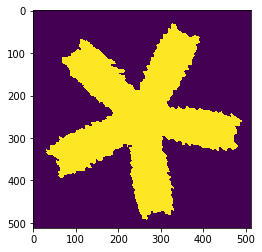

In [45]:
img = data[30][2][1]
plt.imshow(np.asarray(img))
plt.show()

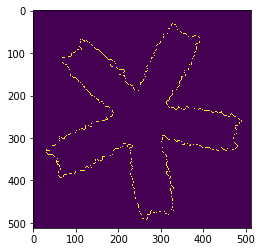

In [42]:
ctr = contour(np.asarray(img))
plt.imshow(ctr)
plt.show()

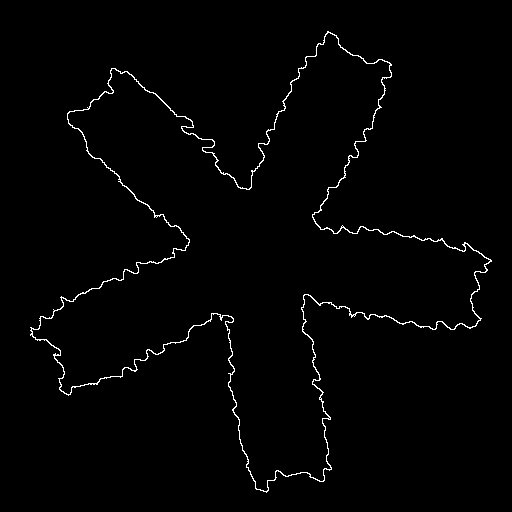

In [43]:
img_ctr = Image.fromarray(ctr)
img_ctr

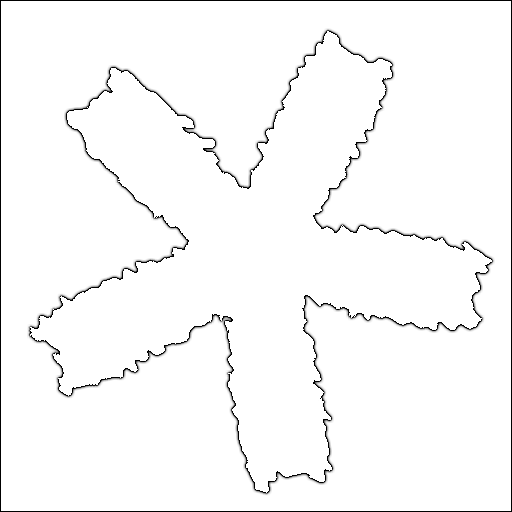

In [44]:
im1 = img.filter(ImageFilter.SMOOTH_MORE).filter(ImageFilter.CONTOUR)
im1

In [29]:
np.array(im1)[21]

array([  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 253, 244, 235, 212, 160,  80,
         0, 255,   0, 255, 255, 255,   0, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255,   0,   0, 255,   0,   0,   0,   0,
       255,   0,  73, 151, 182, 201, 212, 240, 244, 253, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [6]:
def contour(np_img):
    np_contour = copy.deepcopy(np_img)
    for i in range(len(np_img)):
        for j in range(len(np_img[0])):
            if not is_in_contour(np_img, (i,j)):
                np_contour[i,j] = 0.0
    return np_contour

In [7]:
dirs = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
def show_contour(img, contour):
    img_contour = copy.deepcopy(img)
    contour = set(copy.deepcopy(contour))
    for i in range(img.height):
        for j in range(img.width):
            img_contour.putpixel((j,i),255 if (i,j) in contour else 0)
    return img_contour

def is_in_contour(pix_map, point):
    i,j = point
    
    if i < 0 or i >= pix_map.shape[0]:
        return False
    if j < 0 or j >= pix_map.shape[1]:
        return False
    if pix_map[i][j] == 0.0:
        return False
    
    if i == 0 or i == pix_map.shape[0]-1:
        return True
    if j == 0 or j == pix_map.shape[1]-1:
        return True
    
    global dirs
    for the_dir in dirs:
        k,l = i+the_dir[0],j+the_dir[1]
        if pix_map[k][l] == 0.0:
            return True
        
    return False

def extract_contour(pix_map):
    global dirs
    starting_point = (-1,-1)
    for i in range(pix_map.shape[0]):
        for j in range(pix_map.shape[1]):
            if pix_map[i][j] != 0.0:
                starting_point = (i,j)
                break
        if starting_point != (-1,-1):
            break
            
    if starting_point == (-1,-1):
        print("All Black")
        return
    
    seen = {}
    curr_point = starting_point
    
    contour = []
    freeman = []
    
    while not curr_point in seen:
        contour.append(curr_point)
        
        next_point = curr_point
        
        update = False
        
        for (i_dir,the_dir) in enumerate(dirs):
            next_point = (curr_point[0]+the_dir[0],curr_point[1]+the_dir[1])
            if (not next_point in seen or next_point == starting_point) and is_in_contour(pix_map,next_point):
                freeman.append(i_dir)
                update = True
                break
        
        seen[curr_point] = True
        if update:
            curr_point = next_point
    return contour,''.join(map(str,freeman))

In [3]:
import cv2
import numpy as np

In [4]:
test_img = np.array([
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

], dtype=np.uint8)


In [8]:
cv2.findContours(test_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8), [array([[[2, 1]],
  
         [[1, 3]],
  
         [[2, 1]],
  
         [[4, 3]],
  
         [[6, 5]],
  
         [[9, 3]],
  
         [[4, 4]]], dtype=int32)], array([[[-1, -1, -1, -1]]], dtype=int32))

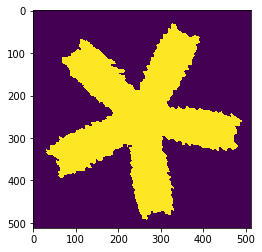

In [5]:
img = data[30][2][2]
plt.imshow(img)
plt.show()

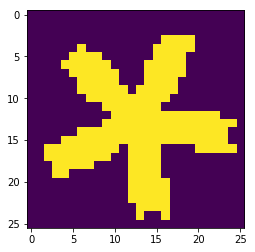

(26, 26)


In [10]:
img_bis = img[::20,::20]
plt.imshow(img_bis)
plt.show()
print(img_bis.shape)

In [11]:
26*26

676

In [12]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

OSError: [Errno 24] Too many open files: '/home/cosmo/Documents/projects/DICG'

In [42]:
from sklearn.linear_model import LogisticRegression

In [14]:
len(np.argwhere(img >= 0.0))
len((img == 0).flatten())

262144

In [48]:
X=np.argwhere(img >= 0.0)
y=(img == 0).flatten()

In [51]:
X_scaled = StandardScaler().fit_transform(X)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.


In [61]:
sk_stump = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(sk_stump,n_estimators=200)
ada.fit(X_scaled,(img == 0).flatten())
print(ada.score(X_scaled,y))

0.839179992676


In [ ]:
svm = SVC()
svm.fit(X_scaled,(img == 0).flatten())
print(svm.score(X_scaled,y))

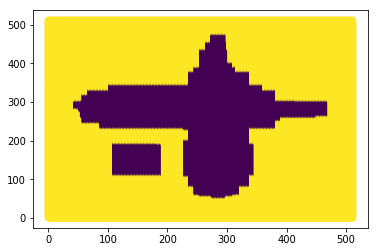

In [62]:
prediction = ada.predict(X_scaled)
#print(prediction)
plt.scatter(X[:,0],X[:,1],c=prediction)
plt.show()

In [56]:
log_reg =  LogisticRegression(max_iter=200)
log_reg.fit(X_scaled,y)
print(log_reg.score(X_scaled,y))

0.685832977295


In [28]:
def plot_frontiere(model, X, y, ax, extra=None, naming=True):
    h = 1 # grid step
    x_min= X[:, 0].min() - 1
    x_max= X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z2d = model.predict(X).reshape((X[:, 0].max(),X[:, 1].max()))
    print(Z2d)
    return
    #Z2d=Z2d.reshape(X.shape)
    if naming:
        ax.set_title("Decision boundary for "+model.name())
    ax.contourf(X[:,0],X[:,1],Z2d, cmap=plt.cm.Paired)
    #ax.scatter(X[:,0],X[:,1], c = y, s = 100)
    if extra != None:
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % extra).lstrip('0'), size=15, horizontalalignment='right')
    return

ValueError: cannot reshape array of size 262144 into shape (511,511)

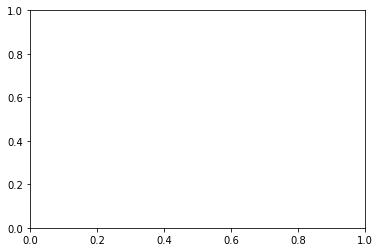

In [29]:
ax = plt.subplot(1,1,1)
plot_frontiere(ada,np.argwhere(img >= 0.0),(img == 0).flatten(),ax,naming=False)
plt.show()